# Introdução
Existem certos processamentos ou pré-processamentos que, caso não sejam executados de forma efetiva durante a análise exploratória dos dados, podem acarretar impactos significativos no ponto de vista estatístico e de modelagem de machine learning. Um desses processos é a detecção e tratamento de outliers.

## O que são outliers?
Outliers são valores extremos que são significativamente diferentes das demais observações. Esses valores geralmente encontram-se fora do padrão da distribuição dos dados. Por exemplo, caso tenhamos dados com um distribuição normal, alguns valores nas caldas da distritribuição podem ser caracterizados como outliers.

Não existe uma maneira exata de definir e identificar outliers. Cada dataset possui sua especificidade e a interpretação dos dados feita por um especialista na área de negócios ou da pesquisa em questão é fundamental para decidir se os valores são de fato outliers ou não

## Como outliers podem ser introduzidos nos datasets?
* Erros mecânicos ou humanos
    * Erros de medidas ou de digitação
    * Corrupção de dados
* Valores extremos genuínos (Cristiano Ronaldo no Futebol)

## Relevância em termos de negócio:
* Modelagem de Fraude em cartões de crédito
    * Outlier pode indicar fraude
* Inserção errônea de dados em um dataset
    * Não necessariamente possui relevância em termos de negócio

## Impactos dos Outliers
* Pode impactar na média e no desvio padrão da amostra

## Como podemos identificar Outliers?
* Análise Quantitativa
    * Z-Score
    * Amplitude Interquartil
* Análise Qualitativa
    * Scatter Plot
    * Box Plot

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import norm

## Identificando Outlier com Z-Score
* O Z-Score nos dá uma idéia do quanto um determinado ponto está afastado da média dos dados
    * Mede quantos desvios padrão abaixo ou acima da média populacional ou amostral os dados estão
    
    $$
    z = \frac{x - \mu}{\sigma}
    $$
    
Onde:
* x: observação
* $\mu$: média
* $\sigma$: padrão

## Distribuição Normal
Quanto mais longe o Z-Score de uma observação está de zero, mais incomum ele é. Um valor de corte padrão para encontrar outliers são "escores" Z de +/-3 ou mais longe de zero. A distribuição de probabilidade abaixo exibe a distribuição Z em uma distribuição normal padrão. Os "escores" Z além de +/- 3 são tão extremos que você mal consegue ver o sombreamento sob a curva.

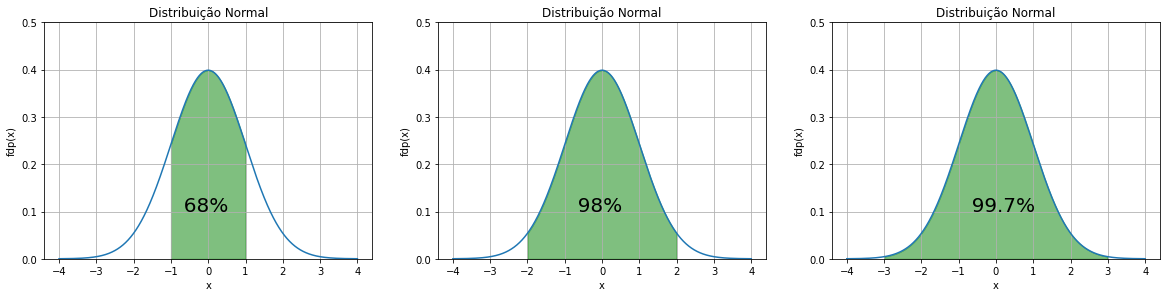

In [5]:
i=1
plt.figure(figsize=(20,20))

for c in ['  68%', '  98%', '  99.7%']:   
    
    plt.subplot(4,3,i)
    x= np.arange(-4,4,0.001)
    plt.plot(x, norm.pdf(x))
    plt.title("Distribuição Normal")
    plt.xlabel('x')
    plt.ylabel('fdp(x)')
    plt.grid(True)
    # preencher 
    px=np.arange(-i,i,0.01)
    plt.ylim(0,0.5)
    plt.fill_between(px,norm.pdf(px),alpha=0.5, color='g')
    # texto
    plt.text(-1,0.1, c , fontsize=20)
    i += 1
    
plt.show()

* Os dados terão **68%** de chances de estar dentro do intervalo que irá de -1 a 1
* Os dados terão **98%** de chances de estar dentro do intervalo que irá de -2 a 2
* Os dados terão **99.7%** de chances de estar dentro do intervalo que irá de -3 a 3

Para uma distribuição normal padrão que estiverem acima/abaixo de 3 e -3 são caracterizados outliers (convenção).

In [6]:
# import random
import random

dataset = random.sample(range(0, 40), 30)
dataset.insert( 8, 1500)
dataset.insert( 3, 1550)

print(dataset)

[2, 7, 16, 1550, 25, 9, 6, 29, 39, 1500, 4, 1, 33, 27, 32, 38, 36, 10, 23, 37, 12, 30, 11, 0, 15, 17, 19, 14, 18, 34, 31, 22]


In [15]:
outliers=[]

def find_outliers(data_set):
    corte_dp =3
    media = np.mean(data_set)
    dp =np.std(data_set)
    
    
    for dado in data_set:
        
        z_score = (dado - media)/dp 
        if np.abs(z_score) > corte_dp:
            outliers.append(dado)
            
    #print('Os outliers são: ', outliers)
    
    return outliers

In [16]:
outliers = find_outliers(dataset)

# outliers
print('Os outliers são: ', outliers)

Os outliers são:  [1550, 1500]


## Identificando Outlier com Amplitude interquartil
### Percentil

* percentil 25 : primeiro quartil
* percentil 50 : segundo quartil ou mediana
* percentil 75 : terceito quartil


In [11]:
data = random.sample(range(1, 11), 10)
data

[6, 8, 2, 5, 1, 3, 10, 7, 4, 9]

In [17]:
p75, p50 = np.percentile(data , [75 , 50])
print('Percentil 75: ' ,p75)
print('Percential 50 (mediana): ' ,p50)

Percentil 75:  7.75
Percential 50 (mediana):  5.5


In [18]:
data.sort()
data

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Amplitude interquartil
* Diferença entre o terceiro (Q3) e o primeiro quartil (Q1)

### Como determinar Outlier com Amplitude Interquartil:
1. Ordena os dados de forma crescente
2. Calcula primeiro e terceito quartil
3. Determina a Amplitude interquartil
4. Encontrar o limite inferior Q1 * 1.5
5. Encontrar o limite superior Q3 * 1.5

In [19]:
# import random
dataset = random.sample(range(0, 40), 30)
dataset.insert( 8, 1500)
dataset.insert( 3, 1550)

print(dataset)

[24, 37, 26, 1550, 21, 28, 5, 3, 1, 1500, 7, 14, 19, 15, 12, 11, 30, 6, 10, 2, 0, 25, 4, 31, 33, 18, 27, 39, 16, 13, 23, 8]


In [20]:
Q1, Q3 = np.percentile(dataset , [25 ,75])
print('Primeiro Quartil ou Pecentil 25: ',Q1)
print('Terciro quartil ou percentil 75  ',Q3)

Primeiro Quartil ou Pecentil 25:  7.75
Terciro quartil ou percentil 75   27.25


In [21]:
Amp_interquartil = Q3 - Q1
print(Amp_interquartil)

19.5


In [22]:
# determinar o limite inferior e o limite superior
limite_inferior = Q1 - (1.5 * Amp_interquartil)
limite_superior = Q3 + (1.5 * Amp_interquartil)

print('Limite Inferior: ',limite_inferior )
print('Limite Superior: ',limite_superior )

Limite Inferior:  -21.5
Limite Superior:  56.5


* Dessa forma, considerando esse critério, podemos afirmar que valores superiores a 56.5 e inferiores a -21.5 são outliers

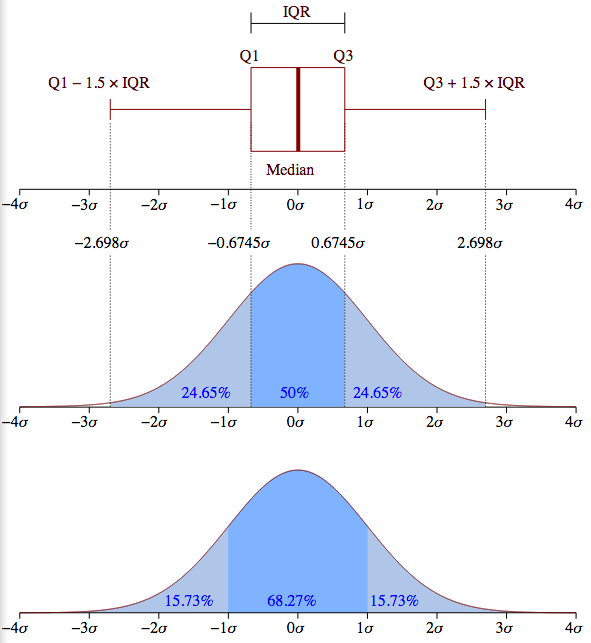

In [24]:
from IPython.display import Image
Image(filename='img.png')

### Sendo:
* IQR = Amplitude Interquartil
* Median = Mediana